# Working Santos Basin 88ma Model - 15-40km

In [1]:
# Importing dependency
import gempy as gp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

pd.set_option('precision', 2)

# Data path, creating the model object and the name
data_path = '../../../input/Santos_Basin/Santos_Basin_88ma_seismic/v2.0.0/'
geo_model = gp.create_model('Santos_Basin_88ma_v2.0.0')

Not subsurface compatibility available


WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
# Extension of the model, resolution of the model and the paths of surface and orientation
gp.init_data(geo_model,
             extent=[0, 4000, 15000, 40000, -13000, -400],
             resolution=[200, 200, 150],
             path_i=data_path + "surfaces_points.csv",
             path_o=data_path + "orientations_points.csv")

Active grids: ['regular']


Santos_Basin_88ma  2023-07-18 12:48

In [3]:
# The surfaces of the model
gp.get_data(geo_model, 'surfaces')

,surface,series,order_surfaces,color,id
0,CAMBURI_II,Default series,1,#015482,1
1,CAMBURI_I,Default series,2,#9f0052,2
2,ARIRI,Default series,3,#ffbe00,3
3,BV_II,Default series,4,#728f02,4
4,BV_I,Default series,5,#443988,5
5,ITAPEMA,Default series,6,#ff3f20,6
6,CAMBORIU,Default series,7,#5DA629,7
7,FALHA,Default series,8,#4878d0,8
8,basement,Basement,1,#ee854a,9


In [4]:
gp.map_stack_to_surfaces(geo_model,
                         {"Strat_Series_1": ('CAMBURI_II'),
                          "Strat_series_2": ('CAMBURI_I'),
                          "Strat_series_3": ('ARIRI'),
                          "Fault_series": ('FALHA'),
                          "Strat_series_5": ('BV_II', 'BV_I', 'ITAPEMA', 'CAMBORIU', 'basement')})

# Ver o grid do modelo
geo_model.grid

Grid Object. Values: 
array([[ 1.00000e+01,  1.50625e+04, -1.29580e+04],
       [ 1.00000e+01,  1.50625e+04, -1.28740e+04],
       [ 1.00000e+01,  1.50625e+04, -1.27900e+04],
       ...,
       [ 3.99000e+03,  3.99375e+04, -6.10000e+02],
       [ 3.99000e+03,  3.99375e+04, -5.26000e+02],
       [ 3.99000e+03,  3.99375e+04, -4.42000e+02]])

In [5]:
# Declaring the fault serie
geo_model.set_is_fault(['Fault_series'])

Fault colors changed. If you do not like this behavior, set change_color to False.


,order_series,BottomRelation,isActive,isFault,isFinite
Strat_Series_1,1,Erosion,True,False,False
Strat_series_2,2,Erosion,True,False,False
Strat_series_3,3,Erosion,True,False,False
Fault_series,4,Fault,True,True,False
Strat_series_5,5,Erosion,True,False,False


In [8]:
geo_model.surfaces.colors.change_colors()

Click to select new colors.


In [7]:
# Camburi_2 = #b95513, CAMBURI_I = #6fc2eb, ARIRI = #4b7bec, BV_II =#ff24e2, BV_I = #feea0b
# ITAPEMA = #ff6600, CAMBORIU = #1e4700, FALHA = #527682, basement = #636363

In [9]:
geo_model.surfaces

,surface,series,order_surfaces,color,id
0,CAMBURI_II,Strat_Series_1,1,#b95513,1
1,CAMBURI_I,Strat_series_2,1,#6fc2eb,2
2,ARIRI,Strat_series_3,1,#4b7bec,3
7,FALHA,Fault_series,1,#527682,4
3,BV_II,Strat_series_5,1,#ff24e2,5
4,BV_I,Strat_series_5,2,#feea0b,6
5,ITAPEMA,Strat_series_5,3,#ff6600,7
6,CAMBORIU,Strat_series_5,4,#1e4700,8
8,basement,Strat_series_5,5,#636363,9


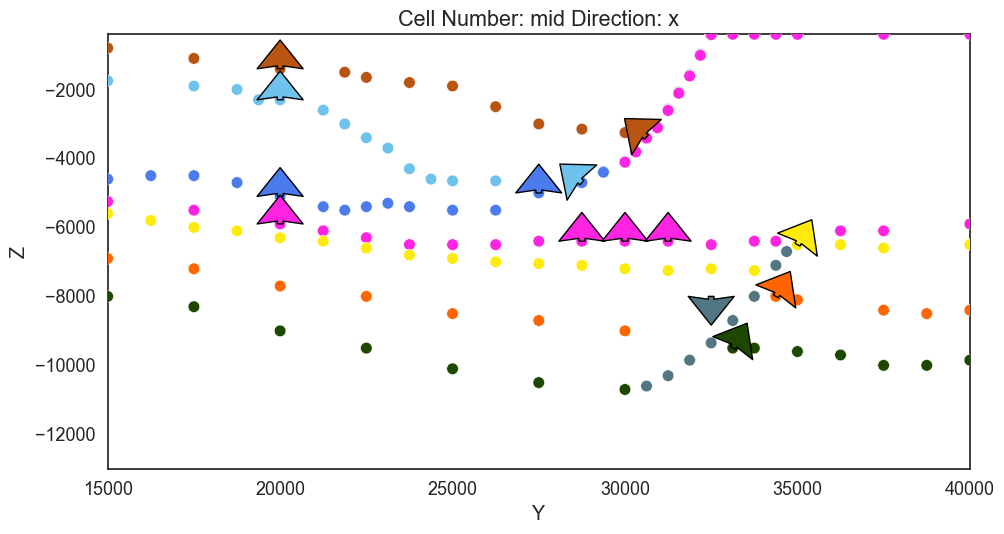

In [10]:
# Plot 2D of the data in X, Y and Z direction
gp.plot_2d(geo_model, direction=['x'], show_data=True, show_boundaries=True, legend=False, show=True)

#gp.plot_2d(geo_model, direction=['y'], show_data=True, show_boundaries=True, legend=False, show=True)

#gp.plot_2d(geo_model, direction=['z'], show_data=True)

In [11]:
# Plot in 3D
gpv = gp.plot_3d(geo_model, plotter_type='basic', image=False, show_data=True, show_surfaces=True, show_scalar=True, show_boundaries=True)

In [12]:
%%time
# Interpolating
gp.set_interpolator(geo_model,
                    theano_optimizer='fast_run',
                    compile_theano=True
                    )

Setting kriging parameters to their default values.
Compiling theano function...
Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  1
Compilation Done!
Kriging values: 
                           values
range                   28280.03
$C_o$                19041904.76
drift equations  [3, 3, 3, 3, 3]
Wall time: 22.1 s


In [13]:
%%time
# Computing a solution for the model
sol = gp.compute_model(geo_model, compute_mesh=True)

Wall time: 2min 45s


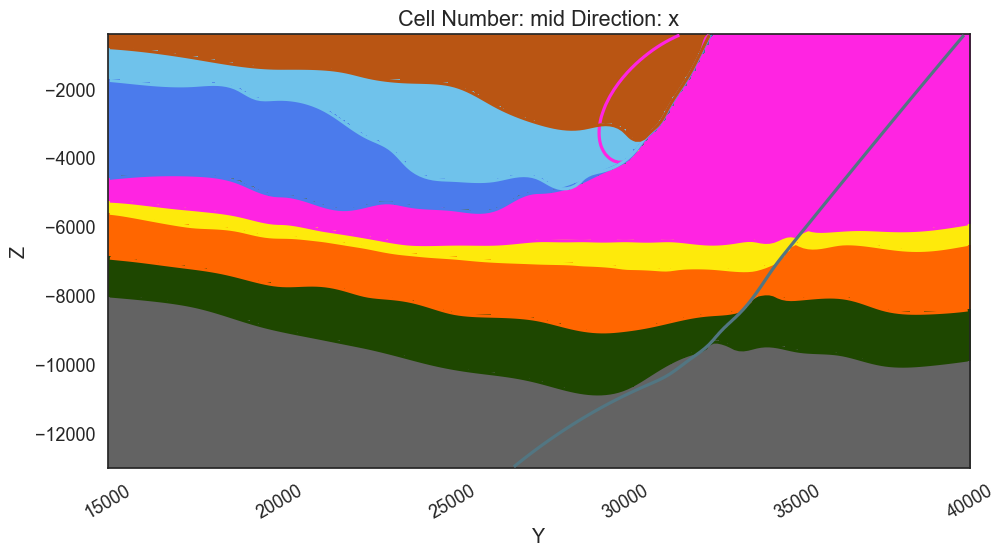

In [14]:
# Plot 2D of Y and X
#gp.plot_2d(geo_model, direction="y", show_data=False, show_lith=True)
gp.plot_2d(geo_model, direction="x", show_data=False, show_lith=True, legend=False)

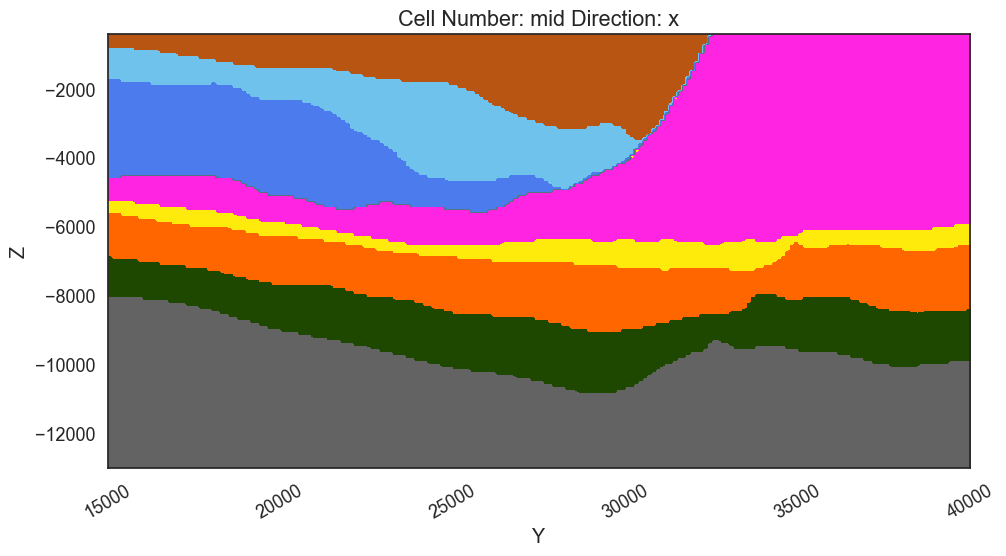

In [16]:
# Plot 2D of Y and X
#gp.plot_2d(geo_model, direction="y", show_data=False, show_lith=True)
gp.plot_2d(geo_model, direction="x", show_data=False, show_lith=True, legend=False, show_boundaries=False)

In [15]:
# Plot 3D
ver, sim = gp.get_surfaces(geo_model)
gpv = gp.plot_3d(geo_model, image=False, plotter_type='basic', show_data=False, show_results=True, show_lith=True, show_boundaries=True)

In [ ]:
# Saving the model in a .zip file
'''
This code saves the model in a .zip file in 
the same folder that the .ipynb file is located
'''

#gp.save_model(geo_model, compress=True)